In [1]:
from keras.datasets import cifar10

((x_train, y_train), (x_test, y_test)) = cifar10.load_data()

Using TensorFlow backend.


170500096/170498071 [==============================] - 27s 0us/step


In [2]:
import numpy as np

I = np.eye(10)
y_train = I[y_train.flatten()]
y_test = I[y_test.flatten()]

#%%
x_train = x_train / 255
x_test = x_test / 255

#%%
x_train = x_train.reshape((x_train.shape[0], -1))
x_test = x_test.reshape((x_test.shape[0], -1))

In [3]:
from keras.models import Model
from keras.layers import Input, Dense

x = Input(shape=(3072,))
z = Dense(200, activation='relu')(x)
o = Dense(10, activation='softmax')(z)

shallow_model = Model(inputs=x, outputs=o)
shallow_model.summary()




_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 200)               614600    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 616,610
Trainable params: 616,610
Non-trainable params: 0
_________________________________________________________________


In [4]:
shallow_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = shallow_model.fit(
        x_train,
        y_train,
        validation_split=0.2,
        batch_size = 500,
        epochs = 50,
        verbose = 1)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 40000 samples, validate on 10000 samples
Epoch 1/50





40000/40000 [==============================] - 1s 37us/step - loss: 2.1034 - acc: 0.2634 - val_loss: 1.9030 - val_acc: 0.3314
Epoch 2/50
40000/40000 [==============================] - 1s 27us/step - loss: 1.8522 - acc: 0.3472 - val_loss: 1.8279 - val_acc: 0.3566
Epoch 3/50
40000/40000 [==============================] - 1s 27us/step - loss: 1.7880 - acc: 0.3707 - val_loss: 1.7741 - val_acc: 0.3763
Epoch 4/50
40000/40000 [==============================] - 1s 27us/step - loss: 1.7459 - acc: 0.3855 - val_loss: 1.7567 - val_acc: 0.3812
Epoch 5/50
40000/40000 [==============================] - 1s 27us/step - loss: 1.7060 - acc: 0.4003 - val_loss: 1.7458 - val_acc: 0.3842
Epoch 6/50
40000/40000 [==============================] - 1s 27us/step - loss: 1.6888 - acc: 0.4070 - val_loss: 1.7111 - val_acc: 0.4014
Epoch 7/50
40000/40000 [

In [5]:
d = Dense(180, activation='relu')(x)
d = Dense(100, activation='relu')(d)
d = Dense(100, activation='relu')(d)
d = Dense(100, activation='relu')(d)
d = Dense(100, activation='relu')(d)
g = Dense(10, activation='softmax')(d)

deep_model = Model(inputs=x, outputs=g)
deep_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 180)               553140    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               18100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total para

In [6]:
deep_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history_deep = deep_model.fit(
        x_train,
        y_train,
        validation_split=0.2,
        batch_size = 500,
        epochs = 50,
        verbose = 1)

Train on 40000 samples, validate on 10000 samples
Epoch 1/50
40000/40000 [==============================] - 2s 47us/step - loss: 1.9830 - acc: 0.2690 - val_loss: 1.9096 - val_acc: 0.3103
Epoch 2/50
40000/40000 [==============================] - 1s 31us/step - loss: 1.7823 - acc: 0.3577 - val_loss: 1.7577 - val_acc: 0.3670
Epoch 3/50
40000/40000 [==============================] - 1s 31us/step - loss: 1.7047 - acc: 0.3881 - val_loss: 1.6855 - val_acc: 0.3943
Epoch 4/50
40000/40000 [==============================] - 1s 31us/step - loss: 1.6302 - acc: 0.4154 - val_loss: 1.6804 - val_acc: 0.3899
Epoch 5/50
40000/40000 [==============================] - 1s 31us/step - loss: 1.5987 - acc: 0.4269 - val_loss: 1.6262 - val_acc: 0.4201
Epoch 6/50
40000/40000 [==============================] - 1s 31us/step - loss: 1.5555 - acc: 0.4423 - val_loss: 1.6027 - val_acc: 0.4360
Epoch 7/50
40000/40000 [==============================] - 1s 31us/step - loss: 1.5190 - acc: 0.4561 - val_loss: 1.6103 - val_acc

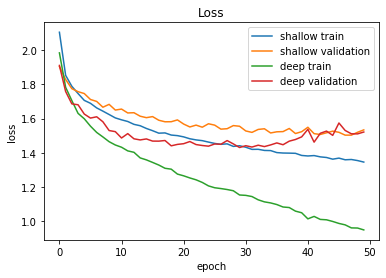

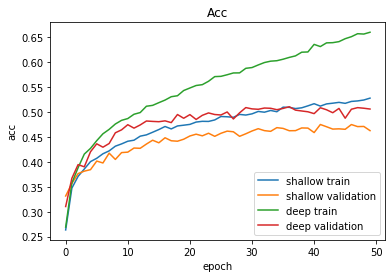

In [7]:
import matplotlib.pyplot as plt

plt.plot(train_history.history['loss'])
plt.plot(train_history.history['val_loss'])
plt.plot(train_history_deep.history['loss'])
plt.plot(train_history_deep.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['shallow train', 'shallow validation', 'deep train', 'deep validation'], loc='upper right')
plt.show()
plt.close()

plt.plot(train_history.history['acc'])
plt.plot(train_history.history['val_acc'])
plt.plot(train_history_deep.history['acc'])
plt.plot(train_history_deep.history['val_acc'])
plt.title('Acc')
plt.ylabel('acc')
plt.xlabel('epoch')
plt.legend(['shallow train', 'shallow validation', 'deep train', 'deep validation'], loc='lower right')
plt.show()
plt.close()